 **TITANIC ACCIDENT ANALYSIS**

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

READIND DATA USING PANDAS

In [2]:
#Read the file
item = pd.read_csv('/content/train.csv')
titanic = pd.DataFrame(item)
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**Description of the Dataset**

Pclass : Passenger Class(1=1st , 2=2nd , 3=3rd)<br>
Survived : Survival(0=No , 1=Yes)<br>
Name : Name of the Passenger<br>
Sex : Male or Female<br>
Age : Age of the Passenger<br>
SibSp : Number of Siblings/Spouses Aboard<br>
Parch : Number of Parents/Children Aboard<br>
Ticket : Ticket Number<br>
Fare : Passenger fare<br>
Cabin : Cabin<br>
Embarked : Port of Ebarkation (C = Cherbourg , S = Southampton , Q = Queenstrown)<br>

In [ ]:
#Count the number of rows and columns 
titanic.shape

(891, 12)

In [ ]:
#Get some statistics
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Get a count of the number of survivals
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


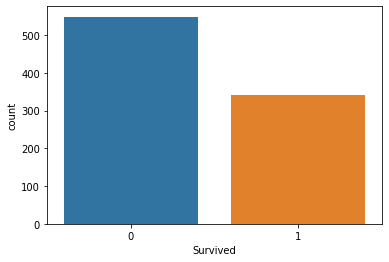

In [ ]:
#Visualise the count of survivors
sns.countplot(titanic['Survived'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

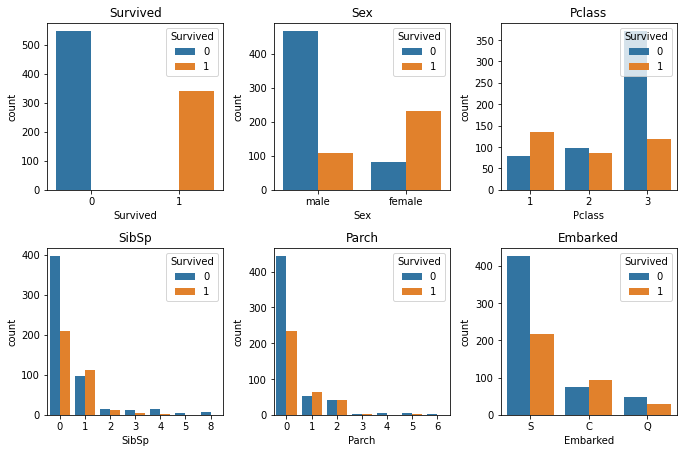

In [ ]:
#Visualise the number of survivals for the columns 'sex','pclass','sibsp','parch','embarked'
cols = ['Survived','Sex','Pclass','SibSp','Parch','Embarked']
n_rows = 2
n_cols = 3
#The Subpolt grid and figure size of each graph

fig , axi = plt.subplots(n_rows , n_cols ,figsize = (n_cols * 3.2 , n_rows * 3.2))

for r in range(0,n_rows):
  for c in range(0,n_cols):

    i = r*n_cols + c #index to go through number of columns
    ax = axi[r][c] #show where to position each subplot
    sns.countplot(titanic[cols[i]] , hue = titanic['Survived'] , ax=ax)
    ax.set_title(cols[i])
    ax.legend(title = 'Survived' , loc = 'upper right')

plt.tight_layout()

Above chart shows the survived based on different columns from the dataset.

HANDLING NULL VALUES

In [ ]:
#We'll get the number of null values in each column
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Separating out the columns which have 35% of missing values in dataset

In [ ]:
drop_col = titanic.isnull().sum()[titanic.isnull().sum()>(0.35*titanic.shape[0])]
drop_col

Cabin    687
dtype: int64

In [ ]:
drop_col.index

Index(['Cabin'], dtype='object')

In [ ]:
titanic.drop(drop_col.index, axis=1, inplace=True)
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

Filling the **Null** values with the **mean** of all values in the column.

In [ ]:
titanic.fillna(titanic.mean(), inplace=True)
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

As **Embarked** contain strings , the null values cannot be replace by the mean of the string.

In [ ]:
titanic['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In **Embarked** we will fill **Null** values with the most frequent value in the column.

In [ ]:
titanic['Embarked'].fillna('S',inplace=True)
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**The correlation between different columns.**

In [ ]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


From above correlation:<br>
***Between Fare and Pclass there is good negative correlation which show that the fare for 1st class is high than 2nd class. And 2nd class have high fare than 3rd class.*** 


In [ ]:
#We can make column of FamilySize by combing 2 columns. 
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']
titanic.drop(['SibSp','Parch'],axis=1,inplace=True)
titanic.corr()

,PassengerId,Survived,Pclass,Age,Fare,FamilySize
PassengerId,1.000000,-0.005007,-0.035144,0.033207,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.069809,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.331339,-0.549500,0.065997
Age,0.033207,-0.069809,-0.331339,1.000000,0.091566,-0.248512
Fare,0.012658,0.257307,-0.549500,0.091566,1.000000,0.217138
FamilySize,-0.040143,0.016639,0.065997,-0.248512,0.217138,1.000000


**FamilySize does not have much correlance with the survived.**<br>
***For lower Pclass the survival rate is more than the higher Pclass survival rate is less as the negative correlation is present.***

Let's check wether the person is alone or not can affect the survival rate. 

In [ ]:
titanic['Alone'] = [0 if titanic['FamilySize'][i]>0 else 1 for i in titanic.index]
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,1


In [ ]:
titanic.groupby(['Alone'])['Survived'].mean()

Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

***If a person is alone then he/she has less chance of survival.The reason migth be the person who is travelling with his family might be belonging to a rich class and prioritiosed over others.***



In [ ]:
titanic[['Alone','Fare']].corr()

,Alone,Fare
Alone,1.000000,-0.271832
Fare,-0.271832,1.000000


***So we can see if the person was not alone then the chance of high ticket price is high.***

In [ ]:
#Look the survival rate by sex
titanic.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


***It shows that women chances of surviving were more than male.This shows womens were priortised over male during rescue.*** 

In [ ]:
#Look at the survival rate by sex and class
titanic.pivot_table('Survived', index = 'Sex', columns = 'Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


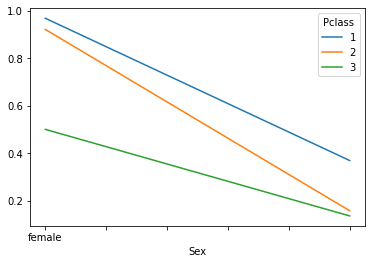

In [ ]:
#Look at the survival rate by sex and class visually
titanic.pivot_table('Survived', index = 'Sex', columns = 'Pclass').plot()

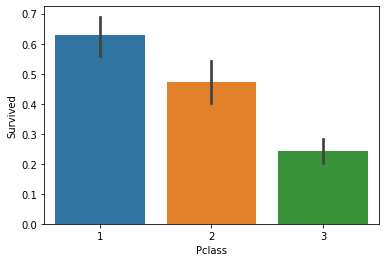

In [ ]:
#Plot the survival rate by class
sns.barplot(x = 'Pclass' , y = 'Survived' , data = titanic)

This shows that the survival chance is decreasing from higher class to lower class. 

In [ ]:
#Look at the survival rate by age,sex,class
age = pd.cut(titanic['Age'] , [0,18,80])
titanic.pivot_table('Survived' , ['Sex' , age] , 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.975904  0.903226  0.495050
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.350427  0.086022  0.121622

***Here we can see the chances of survival for the male from class 2 and 3 between the age (18-80) were very less , it might be because they were the last in priority list.*** 

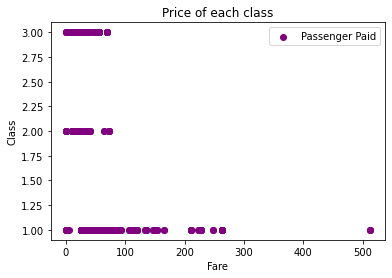

In [ ]:
#plot the prices paid for each class
plt.scatter(titanic['Fare'] , titanic['Pclass'] , color = 'purple' ,label = 'Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Fare')
plt.title('Price of each class')
plt.legend()
plt.show()

***In order to be in the first class the person need to spend minimum 100 Pounds. Which might increase his chance of survival as people in first class were priortised first than other classes.***

In [ ]:
#Look at the number of survival who embarked at different port
titanic.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

***People who embarked at Cherbourg survived the most.***

**CONCLUSION**<br>


*   Female passengers were priortised over men.
*   People with high class or rich people have higher survival rate than others.The hierarichy might have been followed while saving the people.
*   Passengers travelling with there family have higher survival rate.
*   Passengers who boarded the ship at Cherbourg,survived more in portion than the others.


##############################################################################################################################################################################################################